In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import sklearn as sk
import re

In [2]:
df = pd.read_csv('dataanime.csv', encoding = 'unicode_escape')

In [3]:
df.head(5)

,Title,Type,Episodes,Status,Start airing,End airing,Starting season,Broadcast time,Producers,Licensors,Studios,Sources,Genres,Duration,Rating,Score,Scored by,Members,Favorites,Description
0,Fullmetal Alchemist: Brotherhood,TV,64,Finished Airing,2009-4-5,2010-7-4,Spring,Sundays at 17:00 (JST),"Aniplex,Square Enix,Mainichi Broadcasting Syst...","Funimation,Aniplex of America",Bones,Manga,"Action,Military,Adventure,Comedy,Drama,Magic,F...",24 min. per ep.,R,9.25,719706,1176368,105387,"""In order for something to be obtained, someth..."
1,Kimi no Na wa.,Movie,1,Finished Airing,2016-8-26,-,-,-,"Kadokawa Shoten,Toho,Sound Team Don Juan,Lawso...","Funimation,NYAV Post",CoMix Wave Films,Original,"Supernatural,Drama,Romance,School",1 hr. 46 min.,PG-13,9.19,454969,705186,33936,"Mitsuha Miyamizu, a high school girl, yearns t..."
2,GintamaÂ°,TV,51,Finished Airing,2015-4-8,2016-3-30,Spring,Wednesdays at 18:00 (JST),"TV Tokyo,Aniplex,Dentsu","Funimation,Crunchyroll",Bandai Namco Pictures,Manga,"Action,Comedy,Historical,Parody,Samurai,Sci-Fi...",24 min. per ep.,R,9.16,70279,194359,5597,"Gintoki, Shinpachi, and Kagura return as the f..."
3,Steins;Gate 0,TV,23,Currently Airing,2018-4-12,-,Spring,Thursdays at 01:35 (JST),Nitroplus,Funimation,White Fox,Visual novel,"Sci-Fi,Thriller",23 min. per ep.,PG-13,9.16,12609,186331,1117,The dark untold story of Steins;Gate that lead...
4,Steins;Gate,TV,24,Finished Airing,2011-4-6,2011-9-14,Spring,Wednesdays at 02:05 (JST),"Frontier Works,Media Factory,Movic,AT-X,Kadoka...",Funimation,White Fox,Visual novel,"Sci-Fi,Thriller",24 min. per ep.,PG-13,9.14,552791,990419,90365,The self-proclaimed mad scientist Rintarou Oka...


In [4]:
df.columns

Index(['Title', 'Type', 'Episodes', 'Status', 'Start airing', 'End airing',
       'Starting season', 'Broadcast time', 'Producers', 'Licensors',
       'Studios', 'Sources', 'Genres', 'Duration', 'Rating', 'Score',
       'Scored by', 'Members', 'Favorites', 'Description'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1563 entries, 0 to 1562
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Title            1563 non-null   object 
 1   Type             1563 non-null   object 
 2   Episodes         1563 non-null   object 
 3   Status           1563 non-null   object 
 4   Start airing     1563 non-null   object 
 5   End airing       1563 non-null   object 
 6   Starting season  1563 non-null   object 
 7   Broadcast time   1563 non-null   object 
 8   Producers        1563 non-null   object 
 9   Licensors        1563 non-null   object 
 10  Studios          1563 non-null   object 
 11  Sources          1563 non-null   object 
 12  Genres           1563 non-null   object 
 13  Duration         1563 non-null   object 
 14  Rating           1563 non-null   object 
 15  Score            1563 non-null   float64
 16  Scored by        1563 non-null   int64  
 17  Members       

In [6]:
df.describe()

,Score,Scored by,Members,Favorites
count,1563.000000,1563.000000,1.563000e+03,1563.00000
mean,7.905144,60537.209213,1.153567e+05,2309.15483
std,0.340127,99856.869169,1.669685e+05,7358.06195
min,7.480000,144.000000,7.810000e+02,1.00000
25%,7.630000,6876.000000,1.738050e+04,54.00000
50%,7.820000,24730.000000,5.209700e+04,264.00000
75%,8.110000,68933.500000,1.367520e+05,1273.00000
max,9.250000,993775.000000,1.432871e+06,105387.00000


In [7]:
df.isnull().sum()

Title              0
Type               0
Episodes           0
Status             0
Start airing       0
End airing         0
Starting season    0
Broadcast time     0
Producers          0
Licensors          0
Studios            0
Sources            0
Genres             0
Duration           0
Rating             0
Score              0
Scored by          0
Members            0
Favorites          0
Description        0
dtype: int64

In [8]:
def cleaning_df(data):
    pattern = r'[!@#$%^&*()_+{}\[\]:;"\'<>.?/\|\\,Â°,0,^£]'
    return re.sub(pattern, " ", data)
df['Title'] = df['Title'].apply(cleaning_df)

In [9]:
df['Description'] = df['Description'].apply(cleaning_df)

In [10]:
df.head(5)

,Title,Type,Episodes,Status,Start airing,End airing,Starting season,Broadcast time,Producers,Licensors,Studios,Sources,Genres,Duration,Rating,Score,Scored by,Members,Favorites,Description
0,Fullmetal Alchemist Brotherhood,TV,64,Finished Airing,2009-4-5,2010-7-4,Spring,Sundays at 17:00 (JST),"Aniplex,Square Enix,Mainichi Broadcasting Syst...","Funimation,Aniplex of America",Bones,Manga,"Action,Military,Adventure,Comedy,Drama,Magic,F...",24 min. per ep.,R,9.25,719706,1176368,105387,In order for something to be obtained someth...
1,Kimi no Na wa,Movie,1,Finished Airing,2016-8-26,-,-,-,"Kadokawa Shoten,Toho,Sound Team Don Juan,Lawso...","Funimation,NYAV Post",CoMix Wave Films,Original,"Supernatural,Drama,Romance,School",1 hr. 46 min.,PG-13,9.19,454969,705186,33936,Mitsuha Miyamizu a high school girl yearns t...
2,Gintama,TV,51,Finished Airing,2015-4-8,2016-3-30,Spring,Wednesdays at 18:00 (JST),"TV Tokyo,Aniplex,Dentsu","Funimation,Crunchyroll",Bandai Namco Pictures,Manga,"Action,Comedy,Historical,Parody,Samurai,Sci-Fi...",24 min. per ep.,R,9.16,70279,194359,5597,Gintoki Shinpachi and Kagura return as the f...
3,Steins Gate,TV,23,Currently Airing,2018-4-12,-,Spring,Thursdays at 01:35 (JST),Nitroplus,Funimation,White Fox,Visual novel,"Sci-Fi,Thriller",23 min. per ep.,PG-13,9.16,12609,186331,1117,The dark untold story of Steins Gate that lead...
4,Steins Gate,TV,24,Finished Airing,2011-4-6,2011-9-14,Spring,Wednesdays at 02:05 (JST),"Frontier Works,Media Factory,Movic,AT-X,Kadoka...",Funimation,White Fox,Visual novel,"Sci-Fi,Thriller",24 min. per ep.,PG-13,9.14,552791,990419,90365,The self-proclaimed mad scientist Rintarou Oka...


In [11]:
df.columns

Index(['Title', 'Type', 'Episodes', 'Status', 'Start airing', 'End airing',
       'Starting season', 'Broadcast time', 'Producers', 'Licensors',
       'Studios', 'Sources', 'Genres', 'Duration', 'Rating', 'Score',
       'Scored by', 'Members', 'Favorites', 'Description'],
      dtype='object')

In [12]:
df = df[['Title', 'Type', 'Episodes', 
    #'Status', 
    'Start airing', 'End airing',
      # 'Starting season', 
    'Broadcast time', 
    #'Producers', 'Licensors',
       #'Studios', 
    'Sources', 'Genres', 'Duration', 'Rating', 'Score',
       #'Scored by', 'Members', 'Favorites', 
    'Description']]

In [13]:
df.columns

Index(['Title', 'Type', 'Episodes', 'Start airing', 'End airing',
       'Broadcast time', 'Sources', 'Genres', 'Duration', 'Rating', 'Score',
       'Description'],
      dtype='object')

In [14]:
df.rename(columns = {'Score': 'ImDb_Score'}, inplace = True)

In [15]:
df.columns

Index(['Title', 'Type', 'Episodes', 'Start airing', 'End airing',
       'Broadcast time', 'Sources', 'Genres', 'Duration', 'Rating',
       'ImDb_Score', 'Description'],
      dtype='object')

In [16]:
df.head(5)

,Title,Type,Episodes,Start airing,End airing,Broadcast time,Sources,Genres,Duration,Rating,ImDb_Score,Description
0,Fullmetal Alchemist Brotherhood,TV,64,2009-4-5,2010-7-4,Sundays at 17:00 (JST),Manga,"Action,Military,Adventure,Comedy,Drama,Magic,F...",24 min. per ep.,R,9.25,In order for something to be obtained someth...
1,Kimi no Na wa,Movie,1,2016-8-26,-,-,Original,"Supernatural,Drama,Romance,School",1 hr. 46 min.,PG-13,9.19,Mitsuha Miyamizu a high school girl yearns t...
2,Gintama,TV,51,2015-4-8,2016-3-30,Wednesdays at 18:00 (JST),Manga,"Action,Comedy,Historical,Parody,Samurai,Sci-Fi...",24 min. per ep.,R,9.16,Gintoki Shinpachi and Kagura return as the f...
3,Steins Gate,TV,23,2018-4-12,-,Thursdays at 01:35 (JST),Visual novel,"Sci-Fi,Thriller",23 min. per ep.,PG-13,9.16,The dark untold story of Steins Gate that lead...
4,Steins Gate,TV,24,2011-4-6,2011-9-14,Wednesdays at 02:05 (JST),Visual novel,"Sci-Fi,Thriller",24 min. per ep.,PG-13,9.14,The self-proclaimed mad scientist Rintarou Oka...


In [17]:
df['Start airing'].notnull().count()

1563

In [18]:
df.drop_duplicates()

,Title,Type,Episodes,Start airing,End airing,Broadcast time,Sources,Genres,Duration,Rating,ImDb_Score,Description
0,Fullmetal Alchemist Brotherhood,TV,64,2009-4-5,2010-7-4,Sundays at 17:00 (JST),Manga,"Action,Military,Adventure,Comedy,Drama,Magic,F...",24 min. per ep.,R,9.25,In order for something to be obtained someth...
1,Kimi no Na wa,Movie,1,2016-8-26,-,-,Original,"Supernatural,Drama,Romance,School",1 hr. 46 min.,PG-13,9.19,Mitsuha Miyamizu a high school girl yearns t...
2,Gintama,TV,51,2015-4-8,2016-3-30,Wednesdays at 18:00 (JST),Manga,"Action,Comedy,Historical,Parody,Samurai,Sci-Fi...",24 min. per ep.,R,9.16,Gintoki Shinpachi and Kagura return as the f...
3,Steins Gate,TV,23,2018-4-12,-,Thursdays at 01:35 (JST),Visual novel,"Sci-Fi,Thriller",23 min. per ep.,PG-13,9.16,The dark untold story of Steins Gate that lead...
4,Steins Gate,TV,24,2011-4-6,2011-9-14,Wednesdays at 02:05 (JST),Visual novel,"Sci-Fi,Thriller",24 min. per ep.,PG-13,9.14,The self-proclaimed mad scientist Rintarou Oka...
...,...,...,...,...,...,...,...,...,...,...,...,...
1558,Kuroshitsuji II,TV,12,2010-7-2,2010-9-17,-,Manga,"Action,Comedy,Demons,Supernatural,Fantasy,Shounen",24 min. per ep.,R,7.48,The stage of Kuroshitsuji II opens on the life...
1559,Minami-ke Natsuyasumi,OVA,1,2013-8-6,-,-,Manga,"Comedy,Slice of Life",28 min.,PG-13,7.48,Second Minami-ke OVA bundled with the 11th vol...
1560,Naruto Shippuuden Movie 3 - Hi no Ishi wo Tsu...,Movie,1,2009-8-1,-,-,Manga,"Action,Comedy,Martial Arts,Shounen,Super Power",1 hr. 35 min.,PG-13,7.48,Ninjas with bloodline limits begin disappearin...
1561,Persona 4 the Animation The Factor of Hope,Movie,1,2012-6-9,-,-,-,"Adventure,Mystery,Super Power,Supernatural,School",1 hr. 30 min.,PG-13,7.48,Recap of the entire 25-episode television anim...


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1563 entries, 0 to 1562
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Title           1563 non-null   object 
 1   Type            1563 non-null   object 
 2   Episodes        1563 non-null   object 
 3   Start airing    1563 non-null   object 
 4   End airing      1563 non-null   object 
 5   Broadcast time  1563 non-null   object 
 6   Sources         1563 non-null   object 
 7   Genres          1563 non-null   object 
 8   Duration        1563 non-null   object 
 9   Rating          1563 non-null   object 
 10  ImDb_Score      1563 non-null   float64
 11  Description     1563 non-null   object 
dtypes: float64(1), object(11)
memory usage: 146.7+ KB


<Axes: >

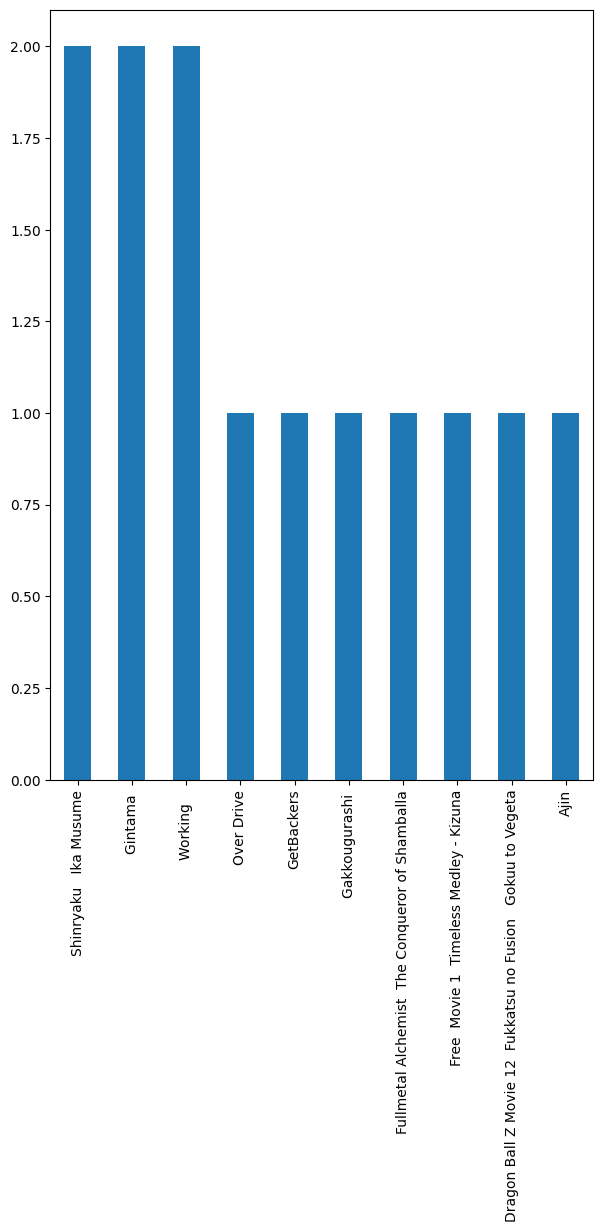

In [20]:
df['Title'].value_counts().head(10).plot(kind = 'bar', figsize = (7,10))

In [21]:
df.groupby(['Type'], as_index = False)['ImDb_Score'].sum().sort_values(by = 'Type', ascending = True)

,Type,ImDb_Score
0,Movie,2630.14
1,Music,123.98
2,ONA,285.40
3,OVA,1492.59
4,Special,1297.43
5,TV,6526.20


In [22]:
result = df.groupby(['Type', 'Rating']).size().reset_index(name='Rat')
result = result.sort_values(by='Type', ascending=True)

In [23]:
result

,Type,Rating,Rat
0,Movie,G,48
1,Movie,None,6
2,Movie,PG,24
3,Movie,PG-13,192
4,Movie,R,63
5,Music,G,10
6,Music,PG-13,6
7,ONA,G,1
8,ONA,None,1
9,ONA,PG,2


In [24]:
df.head(5)

,Title,Type,Episodes,Start airing,End airing,Broadcast time,Sources,Genres,Duration,Rating,ImDb_Score,Description
0,Fullmetal Alchemist Brotherhood,TV,64,2009-4-5,2010-7-4,Sundays at 17:00 (JST),Manga,"Action,Military,Adventure,Comedy,Drama,Magic,F...",24 min. per ep.,R,9.25,In order for something to be obtained someth...
1,Kimi no Na wa,Movie,1,2016-8-26,-,-,Original,"Supernatural,Drama,Romance,School",1 hr. 46 min.,PG-13,9.19,Mitsuha Miyamizu a high school girl yearns t...
2,Gintama,TV,51,2015-4-8,2016-3-30,Wednesdays at 18:00 (JST),Manga,"Action,Comedy,Historical,Parody,Samurai,Sci-Fi...",24 min. per ep.,R,9.16,Gintoki Shinpachi and Kagura return as the f...
3,Steins Gate,TV,23,2018-4-12,-,Thursdays at 01:35 (JST),Visual novel,"Sci-Fi,Thriller",23 min. per ep.,PG-13,9.16,The dark untold story of Steins Gate that lead...
4,Steins Gate,TV,24,2011-4-6,2011-9-14,Wednesdays at 02:05 (JST),Visual novel,"Sci-Fi,Thriller",24 min. per ep.,PG-13,9.14,The self-proclaimed mad scientist Rintarou Oka...


In [25]:
df['Episodes'].unique()

array(['64', '1', '51', '23', '24', '110', '148', '22', '13', '7', '12',
       '201', '10', '25', '26', '75', '4', '11', '43', '27', '37', '39',
       '47', '99', '120', '101', '-', '2', '50', '112', '62', '33', '94',
       '3', '8', '14', '40', '15', '77', '291', '203', '79', '6', '70',
       '38', '500', '103', '153', '102', '45', '21', '63', '175', '52',
       '5', '28', '145', '36', '78', '60', '69', '178', '35', '34', '109',
       '113', '114', '9', '49', '61', '97', '366', '167', '54', '358',
       '104', '20', '220', '48', '42', '46', '100', '142', '373', '131',
       '195', '1787', '19', '17', '147', '73', '127', '74', '16', '150',
       '140', '76', '53', '98', '29', '115', '18', '124', '224', '44',
       '154', '58'], dtype=object)

In [26]:
df['Episodes'].value_counts()

1      525
12     182
13     137
26     106
24      68
      ... 
167      1
54       1
358      1
33       1
58       1
Name: Episodes, Length: 107, dtype: int64

In [27]:
df['Episodes'].dtype

dtype('O')

In [28]:
df['Episodes'].replace( {'-' : '525'}, inplace = True)

In [29]:
df['Episodes'].unique()

array(['64', '1', '51', '23', '24', '110', '148', '22', '13', '7', '12',
       '201', '10', '25', '26', '75', '4', '11', '43', '27', '37', '39',
       '47', '99', '120', '101', '525', '2', '50', '112', '62', '33',
       '94', '3', '8', '14', '40', '15', '77', '291', '203', '79', '6',
       '70', '38', '500', '103', '153', '102', '45', '21', '63', '175',
       '52', '5', '28', '145', '36', '78', '60', '69', '178', '35', '34',
       '109', '113', '114', '9', '49', '61', '97', '366', '167', '54',
       '358', '104', '20', '220', '48', '42', '46', '100', '142', '373',
       '131', '195', '1787', '19', '17', '147', '73', '127', '74', '16',
       '150', '140', '76', '53', '98', '29', '115', '18', '124', '224',
       '44', '154', '58'], dtype=object)

In [30]:
 df['Episodes'] = df['Episodes'].astype(int)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1563 entries, 0 to 1562
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Title           1563 non-null   object 
 1   Type            1563 non-null   object 
 2   Episodes        1563 non-null   int32  
 3   Start airing    1563 non-null   object 
 4   End airing      1563 non-null   object 
 5   Broadcast time  1563 non-null   object 
 6   Sources         1563 non-null   object 
 7   Genres          1563 non-null   object 
 8   Duration        1563 non-null   object 
 9   Rating          1563 non-null   object 
 10  ImDb_Score      1563 non-null   float64
 11  Description     1563 non-null   object 
dtypes: float64(1), int32(1), object(10)
memory usage: 140.6+ KB


# Total number of Episodes Telecasted per Anime Title

In [32]:
 Episodes_Telecasted = df.groupby(['Title'], as_index = False)['Episodes'].value_counts().sort_values(by = 'Episodes', ascending = False ).head(10)

In [33]:
df['Genres'].unique()

array(['Action,Military,Adventure,Comedy,Drama,Magic,Fantasy,Shounen',
       'Supernatural,Drama,Romance,School',
       'Action,Comedy,Historical,Parody,Samurai,Sci-Fi,Shounen', ...,
       'Action,Comedy,Demons,Supernatural,Fantasy,Shounen',
       'Adventure,Mystery,Super Power,Supernatural,School',
       'Mystery,Comedy,Super Power,Drama'], dtype=object)

In [34]:
df['Genres'].nunique()

1004

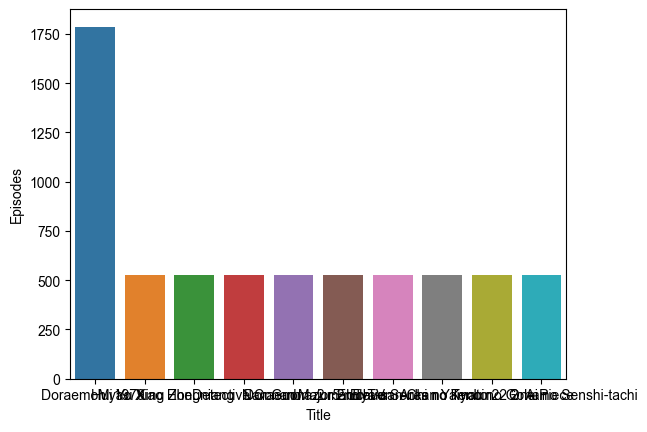

In [35]:
sns.barplot(x = 'Title', y = 'Episodes', data = Episodes_Telecasted )
sns.set(rc={'figure.figsize':(22,11)})

In [36]:
Episodes_Telecasted

,Title,Episodes,count
294,Doraemon 1979,1787,1
920,Mi Yu Xing Zhe,525,1
600,Huyao Xiao Hongniang Nan Guo,525,1
241,Detective Conan,525,1
295,Doraemon 2 5,525,1
898,Major 2nd TV,525,1
619,Inazuma Eleven Ares no Tenbin,525,1
330,Emiya-san Chi no Kyou no Gohan,525,1
1461,Uchuu Senkan Yamato 22 2 Ai no Senshi-tachi,525,1
1054,One Piece,525,1


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1563 entries, 0 to 1562
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Title           1563 non-null   object 
 1   Type            1563 non-null   object 
 2   Episodes        1563 non-null   int32  
 3   Start airing    1563 non-null   object 
 4   End airing      1563 non-null   object 
 5   Broadcast time  1563 non-null   object 
 6   Sources         1563 non-null   object 
 7   Genres          1563 non-null   object 
 8   Duration        1563 non-null   object 
 9   Rating          1563 non-null   object 
 10  ImDb_Score      1563 non-null   float64
 11  Description     1563 non-null   object 
dtypes: float64(1), int32(1), object(10)
memory usage: 140.6+ KB


In [38]:
df['Type'].unique()

array(['TV', 'Movie', 'OVA', 'Special', 'Music', 'ONA'], dtype=object)

In [39]:
df['Type'].value_counts()

TV         821
Movie      333
OVA        190
Special    166
ONA         37
Music       16
Name: Type, dtype: int64

In [40]:
df['Title'].nunique()

1560

# finding out differnt type Geners included in this dataset

In [41]:
geners = df.groupby(['Type'], as_index = False)['Title'].count().sort_values(by = 'Title', ascending = False).head(10)

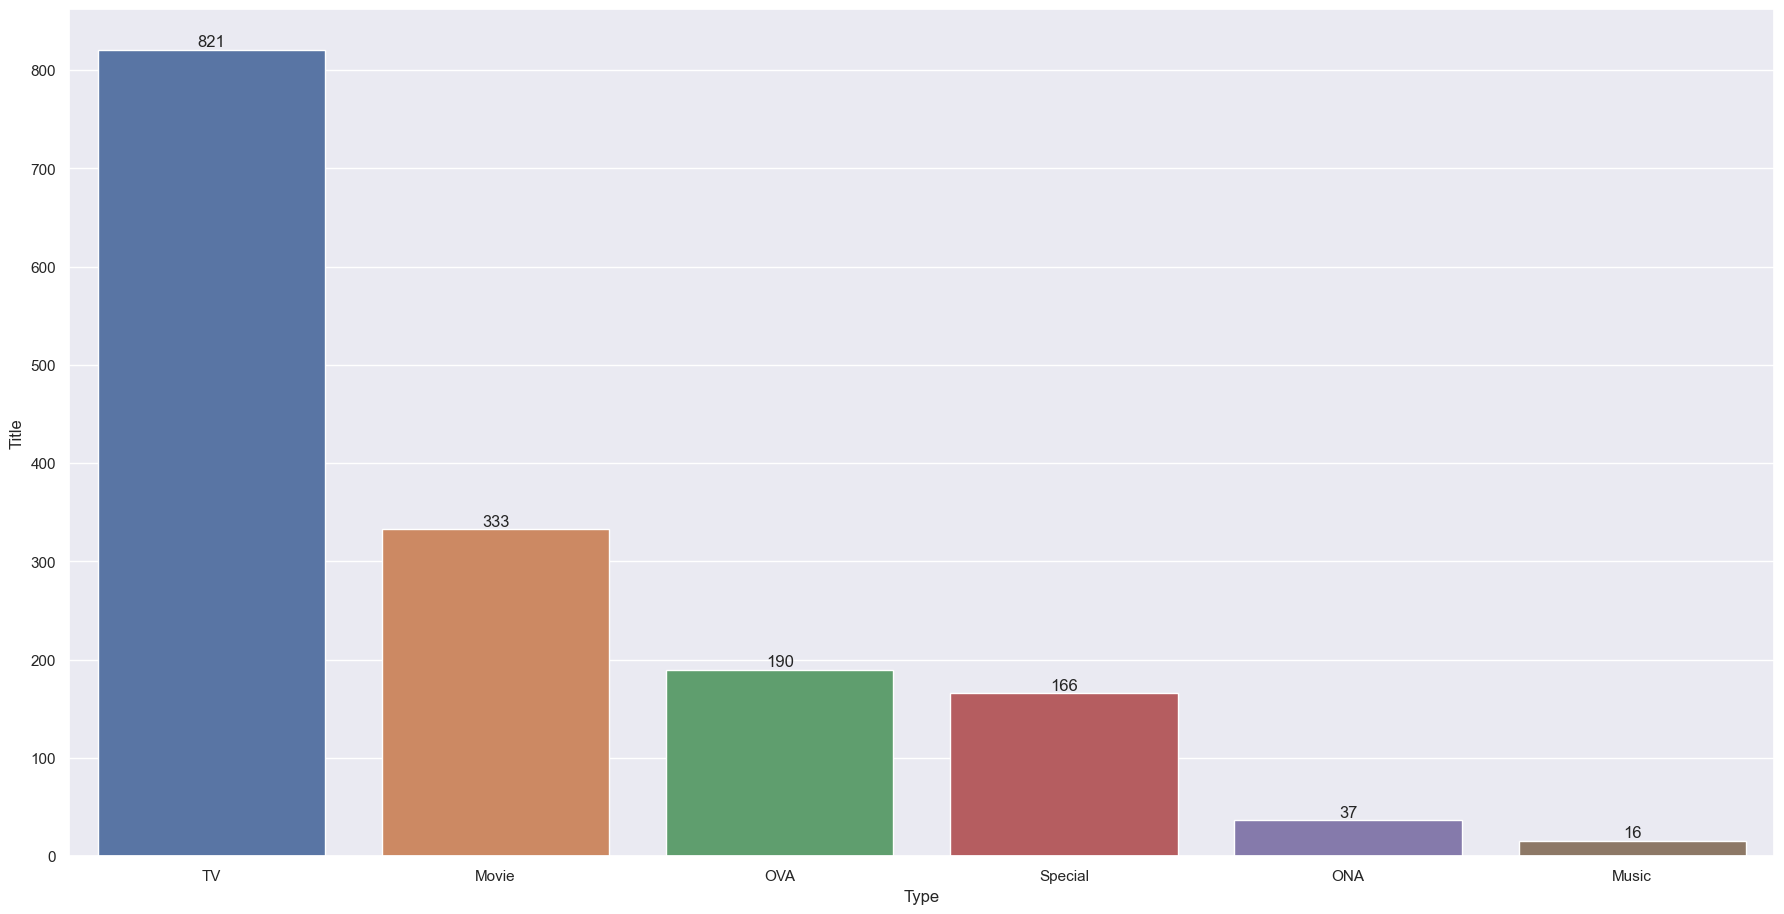

In [42]:
data = sns.barplot(x = 'Type', y = 'Title', data = geners)

for i in data.containers:
    data.bar_label(i)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1563 entries, 0 to 1562
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Title           1563 non-null   object 
 1   Type            1563 non-null   object 
 2   Episodes        1563 non-null   int32  
 3   Start airing    1563 non-null   object 
 4   End airing      1563 non-null   object 
 5   Broadcast time  1563 non-null   object 
 6   Sources         1563 non-null   object 
 7   Genres          1563 non-null   object 
 8   Duration        1563 non-null   object 
 9   Rating          1563 non-null   object 
 10  ImDb_Score      1563 non-null   float64
 11  Description     1563 non-null   object 
dtypes: float64(1), int32(1), object(10)
memory usage: 140.6+ KB


In [44]:
df['Start airing'].unique()

array(['2009-4-5', '2016-8-26', '2015-4-8', ..., '1988-10-2', '2013-8-6',
       '2012-6-9'], dtype=object)

In [45]:
df[df['Start airing'] == '2009-4-5']

,Title,Type,Episodes,Start airing,End airing,Broadcast time,Sources,Genres,Duration,Rating,ImDb_Score,Description
0,Fullmetal Alchemist Brotherhood,TV,64,2009-4-5,2010-7-4,Sundays at 17:00 (JST),Manga,"Action,Military,Adventure,Comedy,Drama,Magic,F...",24 min. per ep.,R,9.25,In order for something to be obtained someth...
95,Cross Game,TV,50,2009-4-5,2010-3-28,-,Manga,"Comedy,Drama,Romance,School,Sports",23 min. per ep.,PG-13,8.50,The main character is Kou Kitamura son of the...
624,Dragon Ball Kai,TV,97,2009-4-5,2011-3-27,Sundays at 09:00 (JST),Manga,"Action,Adventure,Comedy,Fantasy,Martial Arts,S...",23 min. per ep.,PG-13,7.91,Five years after the events of Dragon Ball ma...
699,Hanasakeru Seishounen,TV,39,2009-4-5,2010-2-14,-,Manga,"Drama,Romance,Shoujo",24 min. per ep.,PG-13,7.87,Kajika Louisa Kugami Burnsworth is the only da...
988,Senjou no Valkyria,TV,26,2009-4-5,2009-9-27,-,Game,"Action,Military,Romance",24 min. per ep.,PG-13,7.72,Valkyria Chronicles is set in a fictitious con...
1179,Konnichiwa Anne Before Green Gables,TV,39,2009-4-5,2009-12-27,Sundays at 19:30 (JST),Novel,"Drama,Historical,Kids,Slice of Life",20 min. per ep.,G,7.63,The story of what happened to Anne Shirley bef...


In [46]:
df.iloc[382]

Title                        One Piece Film  Strong World Episode  
Type                                                            OVA
Episodes                                                          1
Start airing                                                      -
End airing                                                        -
Broadcast time                                                    -
Sources                                                       Manga
Genres            Action,Adventure,Comedy,Fantasy,Shounen,Super ...
Duration                                                    18 min.
Rating                                                        PG-13
ImDb_Score                                                     8.12
Description       Set over 2  years prior to the main One Piece ...
Name: 382, dtype: object

In [47]:
df['Start airing'].value_counts()

-             14
2014-4-6       6
2013-10-6      6
2009-4-5       6
2017-10-7      5
              ..
2016-4-28      1
2011-1-22      1
2014-9-24      1
2008-10-17     1
2012-6-9       1
Name: Start airing, Length: 1170, dtype: int64

In [48]:
df['Start airing'].nunique()

1170

# inorder to remove the inconsistency in the dataset i have replaced the date with second highest repetition

In [49]:
df['Start airing'].replace({'-': '2014-4-6'}, inplace = True)


In [50]:
df['Start airing'] = pd.to_datetime(df['Start airing'])

In [51]:
df['Start airing'].unique()

array(['2009-04-05T00:00:00.000000000', '2016-08-26T00:00:00.000000000',
       '2015-04-08T00:00:00.000000000', ...,
       '1988-10-02T00:00:00.000000000', '2013-08-06T00:00:00.000000000',
       '2012-06-09T00:00:00.000000000'], dtype='datetime64[ns]')

In [52]:
df['Start airing'].drop_duplicates(inplace = True)

In [53]:
df['Start airing']

0      2009-04-05
1      2016-08-26
2      2015-04-08
3      2018-04-12
4      2011-04-06
          ...    
1558   2010-07-02
1559   2013-08-06
1560   2009-08-01
1561   2012-06-09
1562   2014-07-08
Name: Start airing, Length: 1563, dtype: datetime64[ns]

In [54]:
 results = df.groupby(['Type','Title'], as_index = False)['Start airing'].value_counts().sort_values(by = 'Start airing', ascending = False).head(10)

In [55]:
results

,Type,Title,Start airing,count
1518,TV,Wotaku ni Koi wa Muzukashii,2018-04-13,1
921,TV,Full Metal Panic Invisible Victory,2018-04-13,1
1030,TV,Hisone to Maso-tan,2018-04-13,1
1426,TV,Steins Gate,2018-04-12,1
1037,TV,Hoozuki no Reitetsu 2nd Season Sono Ni,2018-04-08,1
1303,TV,Persona 5 the Animation,2018-04-08,1
768,TV,Amanchu Advance,2018-04-07,1
1194,TV,Major 2nd TV,2018-04-07,1
827,TV,Boku no Hero Academia 3rd Season,2018-04-07,1
1029,TV,Hinamatsuri,2018-04-06,1


In [56]:
df['Start airing'] = df['Start airing'].astype(str)
df['End airing'] = df['End airing'].astype(str)
df['Year'] = df['Start airing'].str.extract(r'(\d{4})')
df['end_Year'] = df['End airing'].str.extract(r'(\d{4})')
result = df.groupby(['Type', 'Title', 'Year', 'end_Year'], as_index=False)['Start airing'].count()
filtered_result = result[(result['Year'].isin(['1970', '2018'])) | (result['end_Year'].isin(['1970', '2018']))]
filtered_result.reset_index(drop=True, inplace=True)
sorted_result = filtered_result.sort_values(by='end_Year', ascending=False)

In [57]:
sorted_result[sorted_result['Title'].str.startswith('D')]

,Type,Title,Year,end_Year,Start airing
7,TV,Dragon Ball Super,2015,2018,1


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1563 entries, 0 to 1562
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Title           1563 non-null   object 
 1   Type            1563 non-null   object 
 2   Episodes        1563 non-null   int32  
 3   Start airing    1563 non-null   object 
 4   End airing      1563 non-null   object 
 5   Broadcast time  1563 non-null   object 
 6   Sources         1563 non-null   object 
 7   Genres          1563 non-null   object 
 8   Duration        1563 non-null   object 
 9   Rating          1563 non-null   object 
 10  ImDb_Score      1563 non-null   float64
 11  Description     1563 non-null   object 
 12  Year            1563 non-null   object 
 13  end_Year        978 non-null    object 
dtypes: float64(1), int32(1), object(12)
memory usage: 165.0+ KB


In [59]:
df['ImDb_Score'].value_counts()

7.55    31
7.57    30
7.56    30
7.50    29
7.66    28
        ..
8.62     1
9.19     1
8.58     1
8.53     1
9.25     1
Name: ImDb_Score, Length: 146, dtype: int64

In [60]:
df['ImDb_Score'] = df['ImDb_Score'].astype(int)

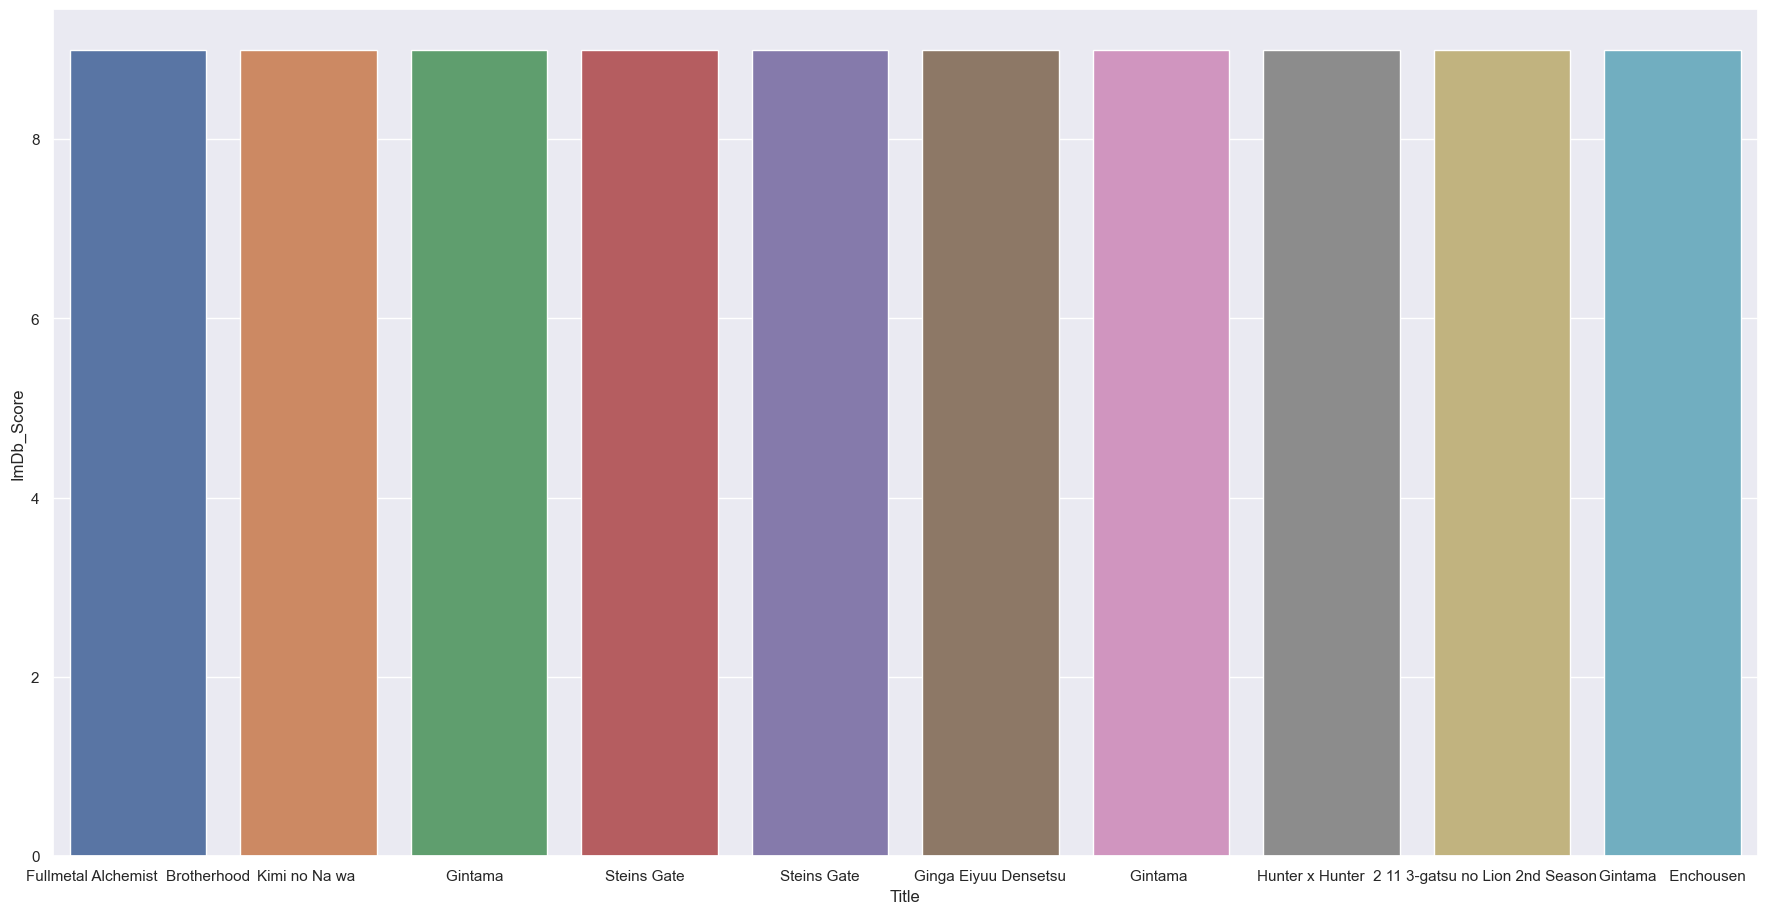

In [61]:
imbd = sns.barplot(x = 'Title' , y = 'ImDb_Score', data = df.head(10) )

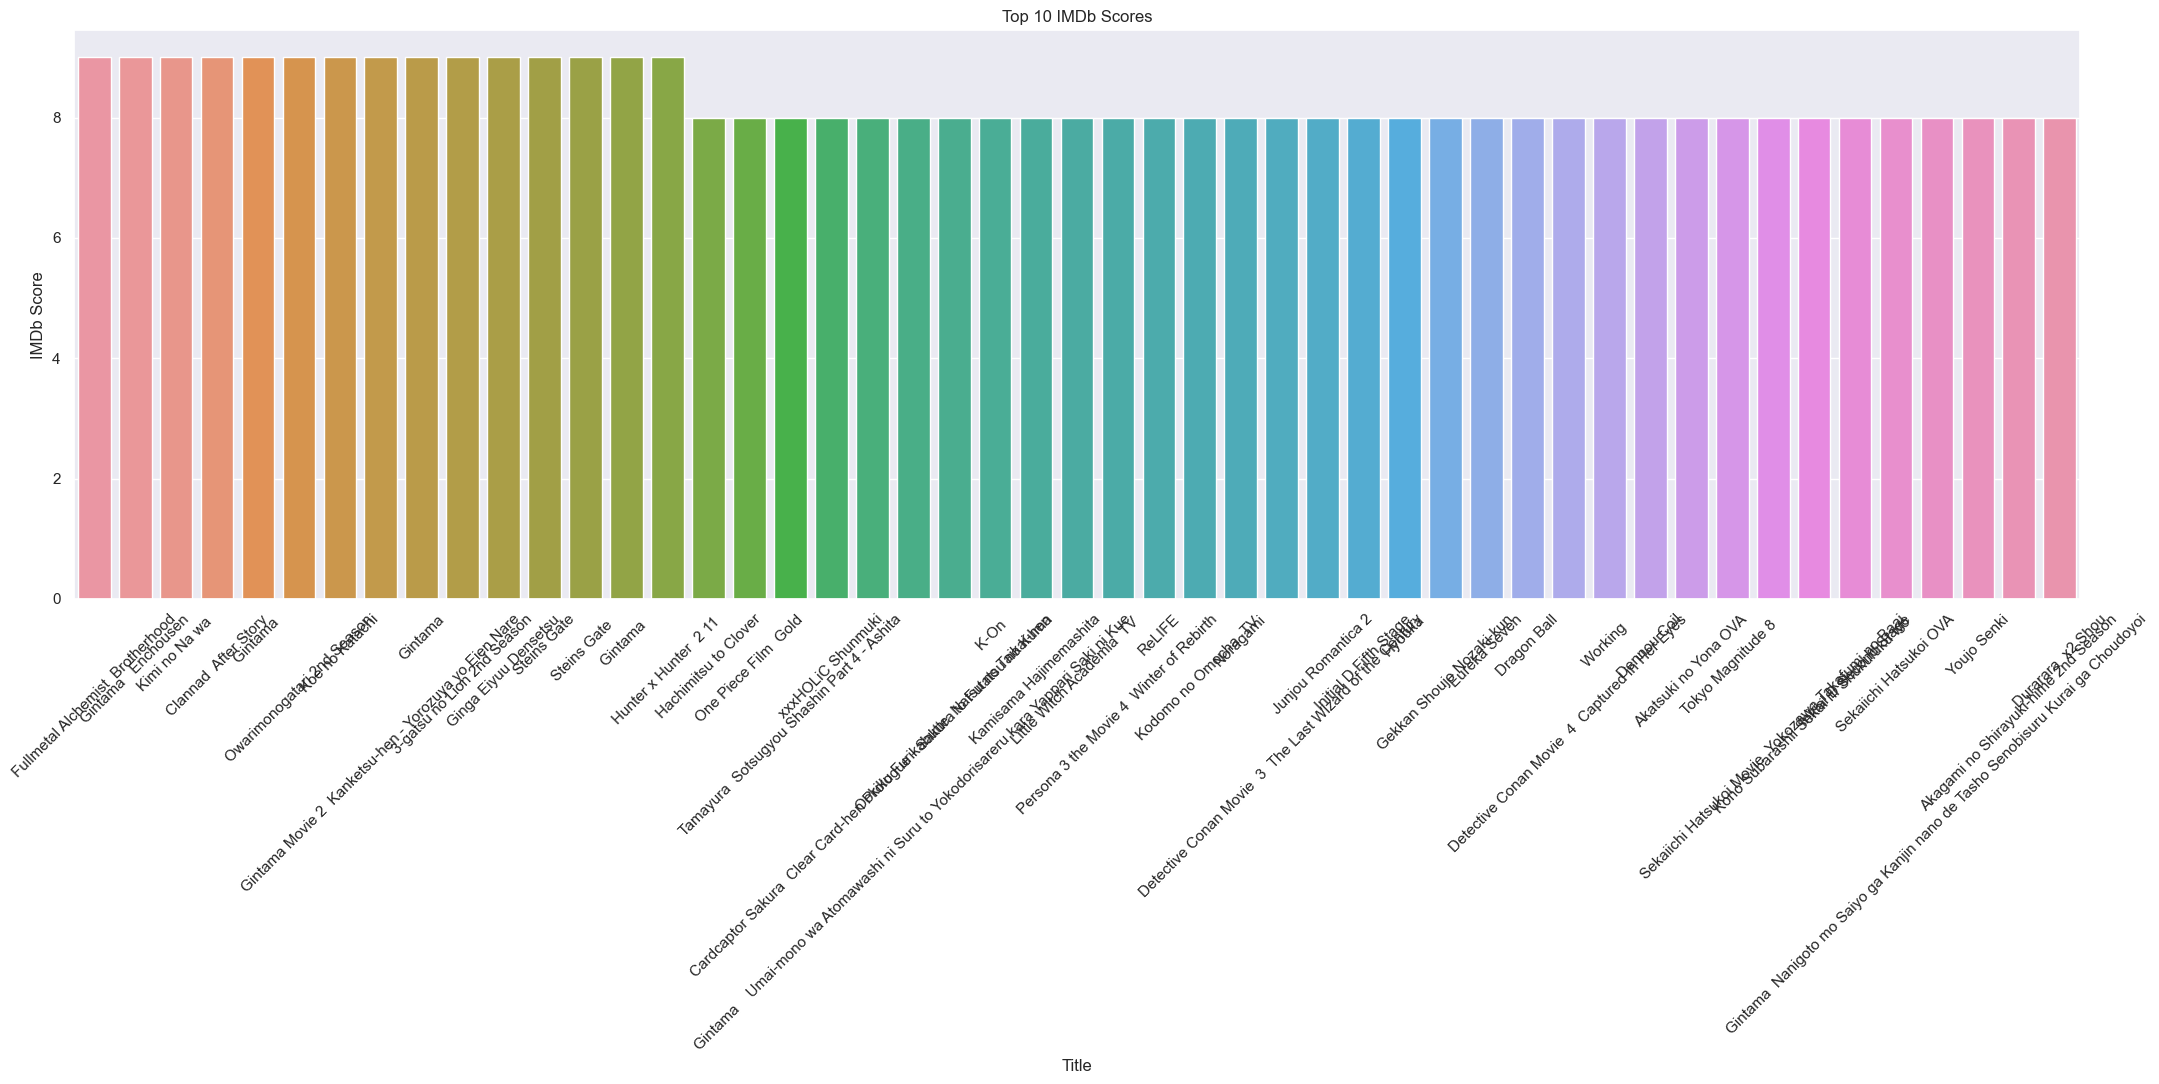

In [62]:
df_sorted = df.sort_values(by='ImDb_Score', ascending=False)
imdb_barplot = sns.barplot(x='Title', y='ImDb_Score', data=df_sorted.head(50))
plt.xlabel('Title')
plt.ylabel('IMDb Score')
plt.title('Top 10 IMDb Scores')
plt.xticks(rotation=45) 
plt.tight_layout()  
plt.show()

In [63]:
df.head()

,Title,Type,Episodes,Start airing,End airing,Broadcast time,Sources,Genres,Duration,Rating,ImDb_Score,Description,Year,end_Year
0,Fullmetal Alchemist Brotherhood,TV,64,2009-04-05,2010-7-4,Sundays at 17:00 (JST),Manga,"Action,Military,Adventure,Comedy,Drama,Magic,F...",24 min. per ep.,R,9,In order for something to be obtained someth...,2009,2010
1,Kimi no Na wa,Movie,1,2016-08-26,-,-,Original,"Supernatural,Drama,Romance,School",1 hr. 46 min.,PG-13,9,Mitsuha Miyamizu a high school girl yearns t...,2016,NaN
2,Gintama,TV,51,2015-04-08,2016-3-30,Wednesdays at 18:00 (JST),Manga,"Action,Comedy,Historical,Parody,Samurai,Sci-Fi...",24 min. per ep.,R,9,Gintoki Shinpachi and Kagura return as the f...,2015,2016
3,Steins Gate,TV,23,2018-04-12,-,Thursdays at 01:35 (JST),Visual novel,"Sci-Fi,Thriller",23 min. per ep.,PG-13,9,The dark untold story of Steins Gate that lead...,2018,NaN
4,Steins Gate,TV,24,2011-04-06,2011-9-14,Wednesdays at 02:05 (JST),Visual novel,"Sci-Fi,Thriller",24 min. per ep.,PG-13,9,The self-proclaimed mad scientist Rintarou Oka...,2011,2011


In [64]:
correlation = df[['']]

KeyError: "None of [Index([''], dtype='object')] are in the [columns]"

In [ ]:
df[df['Title']=='Fullmetal Alchemist  Brotherhood']

In [ ]:
df.describe()

In [ ]:
import pandas as pd
from scipy.stats import pearsonr

# Sample data with non-numeric categorical variables
data = pd.DataFrame({'Category1': ['A', 'B', 'A', 'C', 'B'],
                     'Category2': ['X', 'Y', 'X', 'Z', 'Y'],
                     'NumericVariable': [10, 15, 20, 25, 30]})

# Label encode categorical variables
data['Category1'] = data['Category1'].astype('category').cat.codes
data['Category2'] = data['Category2'].astype('category').cat.codes

# Calculate Pearson correlation between encoded categorical variables and numeric variable
corr_coef, p_value = pearsonr(data['Category1'], data['NumericVariable'])
print(f"Pearson Correlation Coefficient between Category1 and NumericVariable: {corr_coef}")


In [ ]:
sns.pairplot(data = df)

In [ ]:
# Filter out non-numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix for numeric columns only
correlation_matrix = numeric_df.corr()

In [ ]:
sns.pairplot(data = df, hue = 'Type')